# Preprocessing for Image Data in Machine Learning
#### Image preprocessing is essential for improving the performance of deep learning models. It helps in: ✅ Standardizing images
#### ✅ Enhancing quality
#### ✅ Reducing noise
#### ✅ Extracting useful features
#### 
#### Common Preprocessing Techniques for Image Data
#### 1️⃣ Resizing & Aspect Ratio Adjustment
#### 2️⃣ Normalization & Standardization
#### 3️⃣ Data Augmentation
#### 4️⃣ Denoising & Filtering
#### 5️⃣ Edge Detection & Feature Extraction
#### Let's go through each technique with Python examples and compare them.
#### 
#### 1️⃣ Resizing & Aspect Ratio Adjustment
#### 🔹 What is it?
#### Ensures all images have the same dimensions.
#### Helps in reducing computational complexity.
#### Can maintain aspect ratio or distort images.
#### Example in Python (OpenCV & PIL)

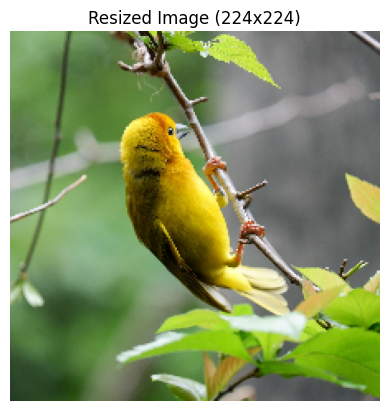

In [3]:

import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image_path = "sample.jpeg"
img = cv2.imread(image_path)

# Resize while maintaining aspect ratio
width, height = 224, 224  # Standard input size for CNNs
resized_img = cv2.resize(img, (width, height))

# Convert to RGB for displaying with Matplotlib
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.imshow(resized_img_rgb)
plt.title("Resized Image (224x224)")
plt.axis("off")
plt.show()


#### Comparison of Resizing Methods
#### Method	Pros	Cons
#### Fixed Size Resizing	Uniform input size	May distort aspect ratio
#### Aspect Ratio Resize & Padding	Maintains proportions	May introduce empty padding
#### Cropping & Centering	Removes unwanted parts	Can lose important details
#### 2️⃣ Normalization & Standardization
#### 🔹 What is it?
#### Converts pixel values into a standard range (e.g., [0,1] or [-1,1]).
#### Helps models converge faster and improves accuracy.
#### Example in Python


In [4]:

import numpy as np

# Convert image to float32 and normalize to [0,1] range
normalized_img = resized_img.astype(np.float32) / 255.0

# Alternative: Standardization (zero mean, unit variance)
mean, std = normalized_img.mean(), normalized_img.std()
standardized_img = (normalized_img - mean) / std

print(f"Normalized Pixel Range: {normalized_img.min()} to {normalized_img.max()}")
print(f"Standardized Mean: {standardized_img.mean()}, Std: {standardized_img.std()}")


Normalized Pixel Range: 0.0 to 1.0
Standardized Mean: -5.676632941487014e-09, Std: 1.0


#### Comparison of Normalization Methods
#### Method	Best for	Pros	Cons
#### Min-Max Scaling ([0,1])	CNNs	Simple, effective	Sensitive to outliers
#### Standardization (Mean=0, Std=1)	Transfer Learning	Works well for pre-trained models	May alter image contrast
#### Per-Channel Normalization	Advanced CNNs	Better color balance	More computation required
#### 3️⃣ Data Augmentation
#### 🔹 What is it?
#### Generates new training samples by modifying existing images.
#### Helps reduce overfitting by making models more robust.
#### Common Augmentations
#### ✅ Rotation
#### ✅ Flipping (Horizontal/Vertical)
#### ✅ Scaling & Cropping
#### ✅ Brightness & Contrast Adjustments
#### 
#### Example in Python (Using Albumentations)

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# Define augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(p=0.5),  # Rotate randomly by 90 degrees
    A.HorizontalFlip(p=0.5),  # Flip horizontally
    A.RandomBrightnessContrast(p=0.5),  # Change brightness/contrast
    ToTensorV2()  # Convert to PyTorch tensor
])

# Apply augmentation
augmented = transform(image=resized_img)["image"]


#### Comparison of Data Augmentation Methods
#### Method	Effect	Pros	Cons
#### Flipping	Increases diversity	Works well for symmetrical objects	Not useful for non-symmetrical objects (e.g., digits)
#### Rotation	Orientation invariance	Improves generalization	Can introduce unnatural orientations
#### Brightness Adjustment	Improves contrast learning	Helps in varying lighting conditions	Can distort original colors
#### 4️⃣ Denoising & Filtering
#### 🔹 What is it?
#### Reduces noise while preserving important features.
#### Used in medical imaging, astronomy, and low-light photos.
#### Common Filtering Methods
#### ✅ Gaussian Blur (Smooths images)
#### ✅ Median Filtering (Removes salt-and-pepper noise)
#### ✅ Bilateral Filtering (Preserves edges)
#### 
#### Example in Python

In [ ]:

# Apply Gaussian blur
blurred_img = cv2.GaussianBlur(resized_img, (5, 5), 0)

# Apply Median filter
median_filtered_img = cv2.medianBlur(resized_img, 5)

# Apply Bilateral filter
bilateral_filtered_img = cv2.bilateralFilter(resized_img, 9, 75, 75)


#### Comparison of Denoising Methods
#### Method	Best for	Pros	Cons
#### Gaussian Blur	Smoothing	Fast, effective	Blurs edges
#### Median Filtering	Removing salt-and-pepper noise	Preserves edges	Slower than Gaussian blur
#### Bilateral Filtering	Retaining sharpness	Preserves fine details	Computationally expensive
#### 5️⃣ Edge Detection & Feature Extraction
#### 🔹 What is it?
#### Extracts important structural information (e.g., edges, corners).
#### Used in object detection, medical imaging, and face recognition.
#### Common Edge Detection Methods
#### ✅ Sobel Operator (Detects horizontal & vertical edges)
#### ✅ Canny Edge Detector (Detects edges using gradients)
#### 
#### Example in Python

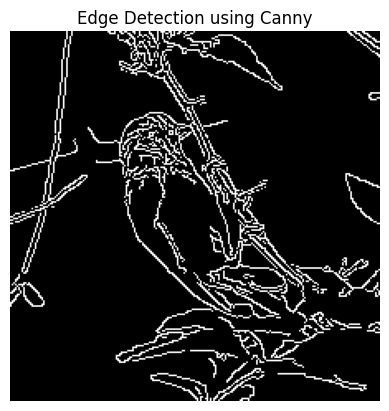

In [6]:

# Convert to grayscale
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Display the edges
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection using Canny")
plt.axis("off")
plt.show()


#### Comparison of Edge Detection Methods
#### Method	Best for	Pros	Cons
#### Sobel Operator	Detecting edges in specific directions	Simple and effective	Sensitive to noise
#### Canny Edge Detector	General-purpose edge detection	Robust to noise	Computationally expensive
#### Final Comparison Table
#### Technique	Purpose	Best for	Pros	Cons
#### Resizing	Standardizing dimensions	CNNs, deep learning	Ensures uniform input	May distort images
#### Normalization	Adjusting pixel values	Image classification	Improves model training	Sensitive to extreme values
#### Data Augmentation	Increasing dataset size	Preventing overfitting	Improves generalization	Can introduce unnatural transformations
#### Denoising	Reducing noise	Medical, astronomy, low-light images	Enhances image quality	May remove details
#### Edge Detection	Extracting features	Object recognition, segmentation	Highlights structures	May require tuning
#### Conclusion
#### 📌 If your model requires uniform input sizes, use resizing.
#### 📌 If you want to improve convergence, apply normalization.
#### 📌 If you have limited data, use data augmentation.
#### 📌 If your dataset is noisy, apply denoising techniques.
#### 📌 If you are doing object detection, use edge detection.